In [ ]:
#Plotting the results.
#Results to select training percentage using classifiers


In [14]:
#basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [15]:
df = pd.read_csv('results/results_classification_tplus1_1657444285.3111436.csv')

In [16]:
df.head()


,Unnamed: 0,Attributes,Train Per,Window size,Classifer,Using PCA,Accuracy
0,0,['Close'],0.1,5,LogisticReg,N,0.531092
1,1,['Close'],0.1,5,LogisticReg,Y,0.531092
2,2,['Close'],0.1,5,RandomForestClassifier,N,0.502521
3,3,['Close'],0.1,5,RandomForestClassifier,Y,0.503081
4,4,['Close'],0.1,5,SVC,N,0.531092


In [31]:
plt.rcParams["figure.figsize"] = (12,12)

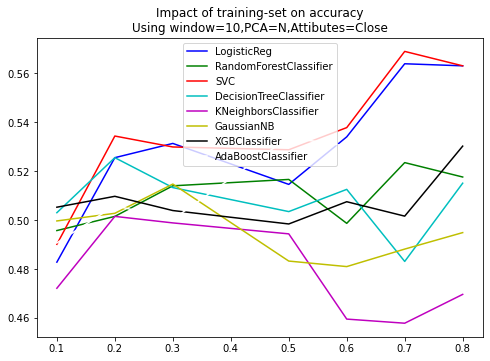

In [24]:
colors = "bgrcmykw"
color_index = 0

count=0
for window in [10]:
    title='Impact of training-set on accuracy\nUsing window=10,PCA=N,Attibutes=Close'
    fname='TrainingSetImpact'
    count=count+1    
    color_index=0
    fig, ax = plt.subplots()
    for name in ['LogisticReg','RandomForestClassifier','SVC','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','XGBClassifier','AdaBoostClassifier']:
        X=[]
        Y=[]
        
        dfSVC = df.loc[(df['Classifer'] == name)]
        dfSVC = dfSVC.loc[(dfSVC['Window size'] == window)]
        dfSVC = dfSVC.loc[(dfSVC['Using PCA'] == 'N')]
        dfSVC = dfSVC.loc[(dfSVC['Attributes'] == "['Close']")]        
        for index in dfSVC.index:
            X.append(dfSVC['Train Per'][index])
            Y.append(dfSVC['Accuracy'][index])  
        
        ax.plot(X, Y, label=name,c=colors[color_index])

        color_index += 1    

    ax.legend() 
    plt.title(title)
    plt.savefig("results/select_train_percentage"+fname+".jpg")
    plt.show()    

In [103]:
df = pd.read_csv('results/results_classification_tplus1_attributes_1656948494.2245066.csv')


In [108]:
df

,Unnamed: 0,Attributes,Train Per,Window size,Classifer,Using PCA,Accuracy
0,0,['Close'],0.5,60,LogisticReg,N,0.525389
1,1,['Close'],0.5,60,LogisticReg,Y,0.546114
2,2,['Close'],0.5,60,RandomForestClassifier,N,0.496373
3,3,['Close'],0.5,60,RandomForestClassifier,Y,0.488083
4,4,['Close'],0.5,60,SVC,N,0.546114
...,...,...,...,...,...,...,...
187,187,"['Close', 'Volume', 'High', 'Low']",0.8,60,GaussianNB,Y,0.572539
188,188,"['Close', 'Volume', 'High', 'Low']",0.8,60,XGBClassifier,N,0.528497
189,189,"['Close', 'Volume', 'High', 'Low']",0.8,60,XGBClassifier,Y,0.494819
190,190,"['Close', 'Volume', 'High', 'Low']",0.8,60,AdaBoostClassifier,N,0.507772


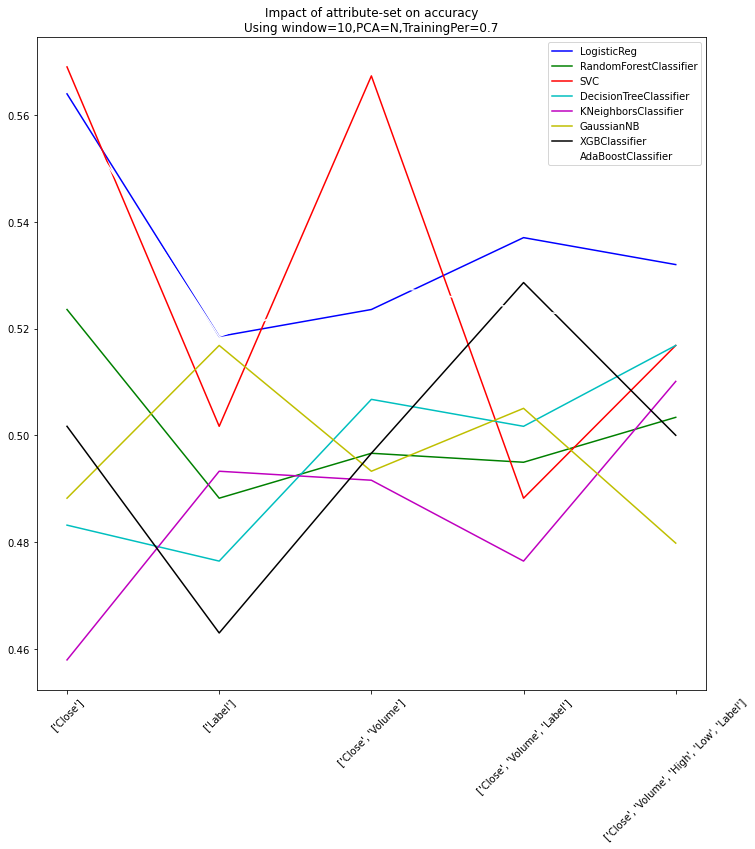

In [33]:
colors = "bgrcmykw"
color_index = 0
attribsSet = ["['Close']",['Label'],"['Close','Volume']","['Close','Volume','Label']","['Close','Volume','High','Low']",
              "['Close', 'Volume', 'High', 'Low', 'Label']"]
train_pcs = [0.7]

 
count=0

for train_percent in train_pcs:
    title='Impact of attribute-set on accuracy\nUsing window=10,PCA=N,TrainingPer=0.7'
    fname='AttributeImpact'
    count=count+1    
    color_index=0
    fig, ax = plt.subplots()
    for name in ['LogisticReg','RandomForestClassifier','SVC','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','XGBClassifier','AdaBoostClassifier']:
            X=[]
            Y=[]
            dfSVC = df.loc[(df['Classifer'] == name)]
            dfSVC = dfSVC.loc[(dfSVC['Window size'] == 10)]
            dfSVC = dfSVC.loc[(dfSVC['Train Per'] == train_percent)]        
            dfSVC = dfSVC.loc[(dfSVC['Using PCA'] == 'N')]        
            for index in dfSVC.index:            
                X.append(dfSVC['Attributes'][index])
                Y.append(dfSVC['Accuracy'][index])  

            ax.plot(X, Y, label=name,c=colors[color_index])

            color_index += 1    

    ax.legend()   
    plt.title(title)
    plt.xticks(rotation=45)
    plt.savefig("results/select_attributes_"+str(count)+".jpg")
    plt.show()    

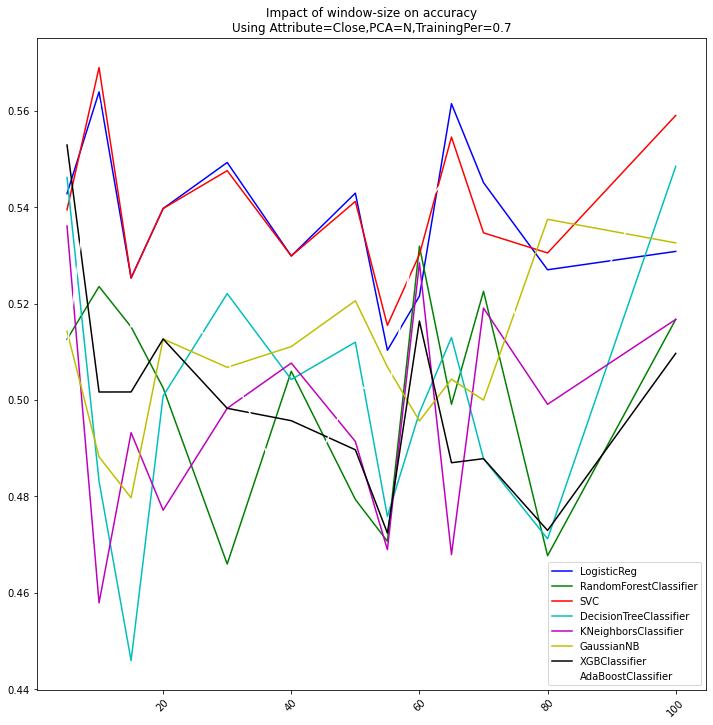

In [34]:
colors = "bgrcmykw"
color_index = 0
attribsSet = ["['Close']",['Label'],"['Close','Volume']","['Close','Volume','Label']","['Close','Volume','High','Low']",
              "['Close', 'Volume', 'High', 'Low', 'Label']"]
train_pcs = [0.7]

 
count=0

for train_percent in train_pcs:
    title='Impact of window-size on accuracy\nUsing Attribute=Close,PCA=N,TrainingPer=0.7'
    fname='WindowSizeImpact'
    count=count+1    
    color_index=0
    fig, ax = plt.subplots()
    for name in ['LogisticReg','RandomForestClassifier','SVC','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','XGBClassifier','AdaBoostClassifier']:
            X=[]
            Y=[]
            dfSVC = df.loc[(df['Classifer'] == name)]
            dfSVC = dfSVC.loc[(dfSVC['Attributes'] == "['Close']")] 
            dfSVC = dfSVC.loc[(dfSVC['Train Per'] == train_percent)]        
            dfSVC = dfSVC.loc[(dfSVC['Using PCA'] == 'N')]        
            for index in dfSVC.index:            
                X.append(dfSVC['Window size'][index])
                Y.append(dfSVC['Accuracy'][index])  

            ax.plot(X, Y, label=name,c=colors[color_index])

            color_index += 1    

    ax.legend()   
    plt.title(title)
    plt.xticks(rotation=45)
    plt.savefig("results/select_attributes_"+str(count)+".jpg")
    plt.show()    

In [3]:
df = pd.read_csv('results/arima.csv')

In [10]:
plt.rcParams["figure.figsize"] = (8,5.5)

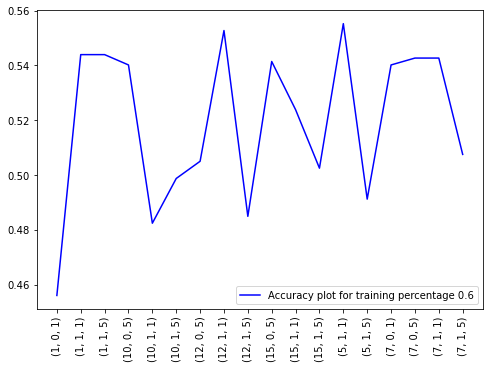

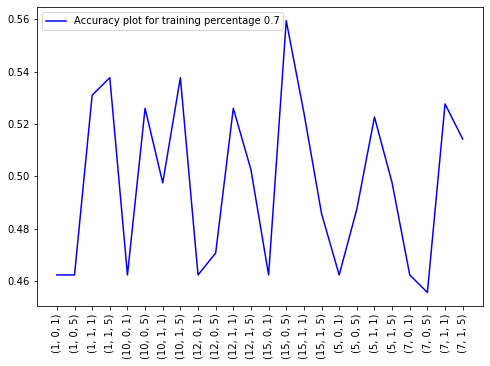

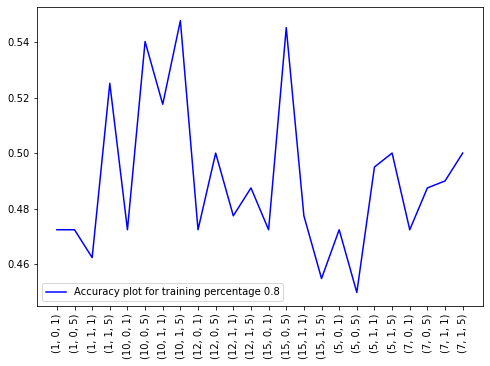

In [12]:
train_pers=[0.6,0.7,0.8]

for train_per in train_pers:
    X=[]
    Y=[]
    fig, ax = plt.subplots()
    dfPlot = df.loc[(df['Train_Per'] == train_per)]
    for index in dfPlot.index:
            X.append(dfPlot['Params'][index])
            Y.append(dfPlot['Accuracy'][index])
    ax.plot(X, Y, label='Accuracy plot for training percentage '+str(train_per),c='b')        

    ax.legend()        
    plt.xticks(rotation=90)
    plt.savefig("results/arima"+str(train_per)+".jpg")
    plt.show()    
    


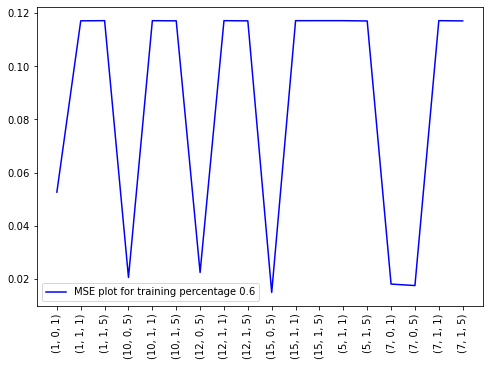

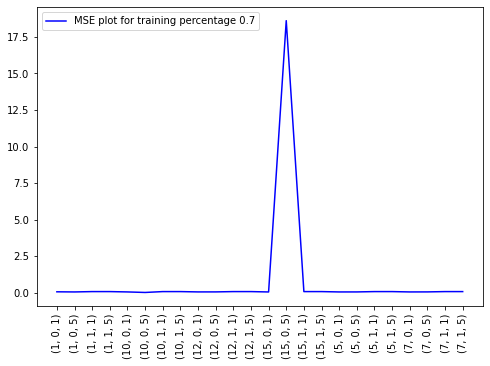

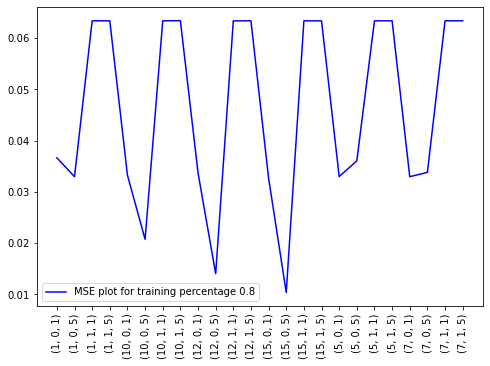

In [13]:
for train_per in train_pers:
    X=[]
    Y=[]
    fig, ax = plt.subplots()
    dfPlot = df.loc[(df['Train_Per'] == train_per)]
    for index in dfPlot.index:
            X.append(dfPlot['Params'][index])
            Y.append(dfPlot['MSE'][index])
    ax.plot(X, Y, label='MSE plot for training percentage '+str(train_per),c='b')        

    ax.legend()        
    plt.xticks(rotation=90)
    plt.savefig("results/arima"+str(train_per)+"_mse.jpg")
    plt.show()                
            
